# Salary prediction using Sklearn

In [317]:
# lets import all the respective nessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import scipy as sc

In [318]:
# Lets use pandas to read Salary.csv file and only read certain columns
read_data = pd.read_csv("Salary.csv")

#lets convert the read data into a DataFrame
df = pd.DataFrame(read_data)

In [319]:
df.shape

(35, 2)

In [320]:
# Lets define variables to store YearsExperience and Salary
feature_cols = ['YearsExperience']
X = df[feature_cols]
y = df['Salary']

In [345]:
type(X)

pandas.core.frame.DataFrame

In [321]:
print(X.shape)
print(y.shape)

(35, 1)
(35,)


In [322]:
# Lets instantiate our Linear Regression model, and fit the respective data
lin_reg = LinearRegression()
lin_reg.fit(X,y)

LinearRegression()

In [323]:
#printing the intercepts and coefficients
print(lin_reg.intercept_)
print(lin_reg.coef_)

28859.52619453144
[8731.94104706]


In [324]:
# Here, I have used zip() function to merge respective elements of two list into two tuples, and ultimately convert to a List
zipped = list(zip(feature_cols, lin_reg.coef_)) 
print(zipped)

[('YearsExperience', 8731.941047062497)]


So, the final Linear Regression model equation is

        y = (YearsExperience * (8731.941047062497))  + (28859.52619453144)
        
Where, 28859.52619453144 is the y-Intercept

In [325]:
# Lets make the salary prediction using the respective years of experience from in-sample data
pred = lin_reg.predict(X)
list(pred)

[38464.661346300185,
 40211.049555712685,
 41957.437765125185,
 46323.408288656436,
 48069.796498068936,
 54182.155231012686,
 55055.34933571893,
 56801.73754513143,
 56801.73754513143,
 61167.70806866269,
 62914.09627807518,
 63787.29038278143,
 63787.29038278143,
 64660.48448748768,
 68153.26090631267,
 71646.03732513767,
 73392.42553455017,
 75138.81374396267,
 80377.97837220017,
 81251.17247690642,
 88236.72531455642,
 90856.30762867516,
 97841.86046632518,
 100461.44278044392,
 104827.41330397516,
 107446.99561809392,
 111812.96614162516,
 112686.1602463314,
 118798.51897927516,
 120544.90718868766,
 126657.2659216314,
 129276.84823575016,
 136262.40107340016,
 141501.56570163765,
 146740.73032987514]

In [326]:
# print the original salary
print(list(y))

[39343, 46205, 37731, 43525, 39891, 56642, 60150, 54445, 64445, 57189, 63218, 55794, 56957, 57081, 61111, 67938, 66029, 83088, 81363, 93940, 91738, 98273, 101302, 113812, 109431, 105582, 116969, 112635, 122391, 121872, 127345, 126756, 128765, 135675, 139465]


In [327]:
# Lets make a prediction for a salary when experience is 15 years with this model
new_salary = lin_reg.predict([[15]])
new_salary

array([159838.64190047])

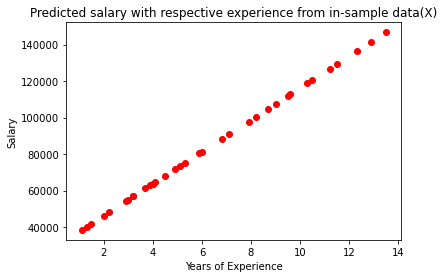

In [328]:
# Plotting a scatter : Training set (X) versus prediction made using X i.e(pred)
plt.scatter(X,pred,color = 'red')
plt.title('Predicted salary with respective experience from in-sample data(X)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

# Since this is a regression problem, we will be measuring errors and not Accuracy. Thus, lower the error, much better the model

# Lets measure MAE, MSE, and RMSE
        - MAE = Mean Absolute Error
        - MSE = Mean Squared Error
        - RMSE = Root Mean Squared Error

In [329]:
# For Mean Absolute Error
from sklearn import metrics
print(metrics.mean_absolute_error(y,pred))

4976.718765130531


In [330]:
# For MSE
print(metrics.mean_squared_error(y,pred))

35006768.19370177


In [331]:
# For RMSE
print(np.sqrt(metrics.mean_squared_error(y,pred)))

5916.65177221896


Here, We made predictions and measured error using in-sample data. However, lets measure our models capabilites using off-sample data. 

# Using Train-Test-Split and Splitting x and y into training and testing sets

In [332]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.4)

In [333]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(21, 1)
(14, 1)
(21,)
(14,)


In [334]:
lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)

LinearRegression()

In [335]:
#printing the intercepts and coefficients
print(lin_reg.intercept_)
print(lin_reg.coef_)

27250.899456481377
[9025.53056178]


In [336]:
# Here, I have used zip() function to merge respective elements of two list into two tuples, and ultimately convert to a List
zipped = list(zip(feature_cols, lin_reg.coef_)) 
print(zipped)

[('YearsExperience', 9025.530561784406)]


So, the final Linear Regression model equation is

        y = (YearsExperience * (8677.16306443))  + (30468.000339224003)
        
Where, the y-Intercept is 30468.000339224003.

In [337]:
# Now, lets make our prediciton in the off-sample data. i.e x_test
y_pred = lin_reg.predict(x_test)
print(list(y_pred))

[108480.67451254102, 40789.19529915799, 81404.08282718781, 75086.21143393873, 63353.021703619, 138264.92536642958, 56132.59725419148, 38984.0891868011, 73281.10532158185, 63353.021703619, 113895.99284961168, 88624.50727661533, 45301.96058005019, 143680.24370350022]


In [338]:
# The below is our actual correct salary for x_test data
print(list(y_test))

[105582, 37731, 93940, 83088, 55794, 128765, 64445, 46205, 66029, 56957, 112635, 91738, 43525, 135675]


In [339]:
# Lets make a prediction for a salary when experience is 15 years with this model
new_salary = lin_reg.predict([[15]])
new_salary

array([162633.85788325])

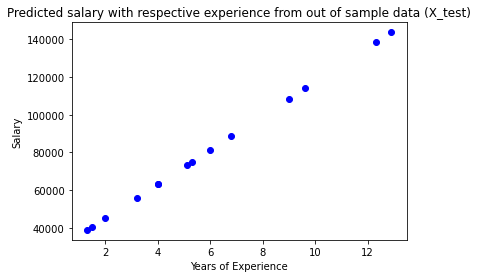

In [344]:
# Plotting a scatter : Testing set (x_test) versus prediction made using X_test i.e(y_pred)
plt.scatter(x_test,y_pred,color = 'blue')
plt.title('Predicted salary with respective experience from out of sample data (X_test)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

# Lets measure MAE, MSE, and RMSE with OUT-sample data 

In [ ]:
# For Mean Absolute Error
print(metrics.mean_absolute_error(y_test,y_pred))

In [ ]:
# For MSE
print(metrics.mean_squared_error(y_test,y_pred))

In [ ]:
# For RMSE
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Here, we can clearly see that, when tested with off sample data, our MAE, MSE and RMSE have reduced.

To conclude, an efficiency of a model or system is best tested with off-sample data because, in real life, the model will definately be faced with data that it has not previously been trained with. 

# Thank you
# Completed by Sujan Neupane
# neupanesujan420@gmail.com